In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import pickle
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [3]:
from keras.preprocessing.sequence import pad_sequences

In [4]:
import os

import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('detector_model_finalX.h5')

In [5]:
MAX_SEQUENCE_LENGTH = 240 # Max tweet size

-

In [6]:
def label(text):
    if(text>0.5):
        print("Depressive")
    else:
        print("Non-Depressive")

In [21]:
test=["my life is happy and awesome"]
sequences_d = tokenizer.texts_to_sequences(test)
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
test_predict = model.predict(data_d)
label(test_predict)

Non-Depressive


In [8]:
test2=["my life is boring and lonely"]
print(test2)
sequences_d = tokenizer.texts_to_sequences(test)
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
test_predict = model.predict(data_d)
label(test_predict)

['my life is boring and lonely']
Non-Depressive


-

In [9]:
def label1(text):
    text=text.flatten()
    for i in range(0,len(text)):
        if(text[i]>0.5):
            print("Depressive")
        else:
            print("Non-Depressive")

In [10]:
test1=['Extreme sadness, lack of energy, hopelessness.',
                  'Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits.',
                  'feeling lonely and leading a boring life.',
                  'happy and best.']
sequences_d = tokenizer.texts_to_sequences(test1)
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
test_predict = model.predict(data_d)
for i in range(len(test1)):
    print(test1[i])
label1(test_predict)

Extreme sadness, lack of energy, hopelessness.
Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits.
feeling lonely and leading a boring life.
happy and best.
Depressive
Non-Depressive
Depressive
Non-Depressive


-

In [11]:
import text2emotion as te
def emo(text):
    em1={'Happy':[0.0], 'Angry':[0.0], 'Surprise':[0.0], 'Sad':[0.0], 'Fear':[0.0]}
    
    for i in range(0,len(text)):
        emo1 = te.get_emotion(text[i])
        k=emo1.values()
        v1=list(k)
        em1['Happy'].append(v1[0])
        em1['Angry'].append(v1[1])
        em1['Surprise'].append(v1[2])
        em1['Sad'].append(v1[3])
        em1['Fear'].append(v1[4])
    em_df= pd.DataFrame.from_dict(em1)
    em_df=em_df[1:]
    a=em_df.mean()
    #print(em_df.mean())
    print(a)
    plt.bar(a.index, a.values)
    plt.xlabel("Emotions used for text")
    plt.ylabel("Numeric value assigned")
    plt.title("Emotion recognition of user")
    plt.show()
    del em_df
    #return a

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Happy       0.00
Angry       0.00
Surprise    0.00
Sad         0.67
Fear        0.33
dtype: float64


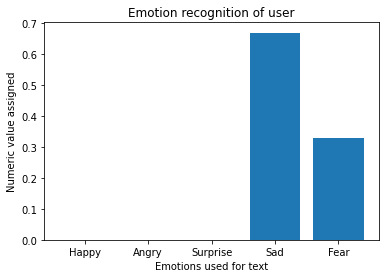

In [14]:
emo(test2)

Happy       0.2500
Angry       0.0000
Surprise    0.1250
Sad         0.4175
Fear        0.2075
dtype: float64


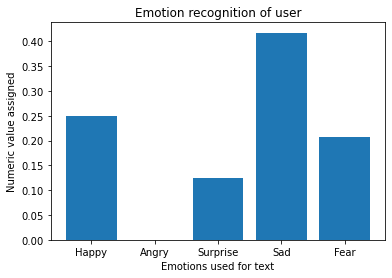

In [12]:
emo(test1)